# Installa librerie

Installa numpy, pandas e matplotlib

In [1]:
!pip3 install numpy pandas matplotlib

  Using cached numpy-2.3.1-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pandas-2.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
Using cached numpy-2.3.1-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
Using cached pandas-2.3.0-cp313-cp313-macosx_11_0_arm64.whl (10.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 40.0 MB/s eta 0:00:000:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 39.6 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 44.1 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using 

# Import delle librerie
Utilizziamo numpy, matplotlib e pandas

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Configurazione

In [15]:
NUM_SIMULAZIONI = 1  # Numero di simulazioni
NUM_CICLI = 2000  # Numero massimo di cicli per simulazione
BANKROLL_INIZIALE = 1580  # Bankroll iniziale
PUNTATE = [5, 10, 20, 40, 80, 160]  # Progressione di puntate
QUOTE_MINIME = [1.2, 1.2, 1.2, 1.2, 1.2, 1.2]  # Quote minime richieste per vincere
PROBABILITA_VINCITA = [1 / quota for quota in QUOTE_MINIME]  # Probabilità di vincita
# PROBABILITA_VINCITA = [0.3, 0.3, 0.3, 0.3, 0.3]  # Probabilità di vincita
GOAL = BANKROLL_INIZIALE*2

# Simula

In [16]:
def simula_cicli():
    bankroll = BANKROLL_INIZIALE
    storico_bankroll = [bankroll]
    cicli_vinti = 0  # Numero di cicli vinti
    cicli_persi = 0  # Numero di cicli persi
    dettagli_giocata = []  # Lista per raccogliere i dettagli di ogni giocata
    ha_raggiunto_goal = False  # Flag per determinare se il GOAL è stato raggiunto
    ha_esaurito_bankroll = False  # Flag per determinare se il bankroll è esaurito

    for ciclo in range(NUM_CICLI):
        puntata_corrente = 0  # Iniziamo sempre dal primo importo della progressione
        perdite_consecutive = 0  # Contatore delle perdite consecutive
        ciclo_vinto = False  # Flag per determinare se il ciclo è vinto o perso
        puntate_perse_totali = 0  # Somma di tutte le puntate perse fino al momento

        for scommessa_numero in range(len(PUNTATE)):

            if puntata_corrente >= len(PUNTATE):  # Se puntata_corrente supera la lunghezza della lista
                break  # Interrompi il ciclo (anche se non dovremmo mai arrivare a questo punto)

            if bankroll > GOAL:
               ha_raggiunto_goal = True
               break  # Se il bankroll supera il GOAL, terminiamo la simulazione

            if bankroll <= 0:
                ha_esaurito_bankroll = True
                break  # Se il bankroll è esaurito, terminiamo la simulazione
                
            importo_scommessa = PUNTATE[puntata_corrente]
            quota_minima = QUOTE_MINIME[puntata_corrente]

            if bankroll < importo_scommessa:
                ha_esaurito_bankroll = True
                break  # Se non ci sono abbastanza fondi, interrompiamo il ciclo

            # Simula la scommessa
            bankroll -= importo_scommessa
            vincita = 0
            netto = 0
            vinta = False

            if np.random.rand() < PROBABILITA_VINCITA[puntata_corrente]:
                # Vincita
                vincita = (importo_scommessa * quota_minima)  # Vincita totale (importo scommesso * quota)
                bankroll += vincita  # Aggiungi la vincita al bankroll
                vinta = True
                perdite_consecutive = 0  # Reset delle perdite consecutive

                # Aggiungi i dettagli della giocata alla lista
                dettagli_giocata.append({
                    'Ciclo N': ciclo + 1,
                    'Scommessa N': scommessa_numero + 1,
                    'Puntata': importo_scommessa,
                    'Quota': quota_minima,
                    'Vincita': vincita,
                    'Netto': vincita - importo_scommessa,  # Solo la differenza tra vincita e puntata
                    'Vinta?': 'Sì',
                    'Bankroll': bankroll
                })

                # Se il ciclo è vinto, passiamo al prossimo ciclo
                cicli_vinti += 1
                break  # Fine del ciclo dopo una vincita

            else:
                # Perdita
                perdite_consecutive += 1
                puntate_perse_totali += importo_scommessa  # Aggiungi la puntata alla somma delle perdite
                if perdite_consecutive >= len(PUNTATE):
                    cicli_persi += 1
                    break  # Concludi il ciclo con una perdita

                # In caso di perdita, raddoppiamo la puntata (ma non oltre la sesta)
                if puntata_corrente < len(PUNTATE):
                    puntata_corrente += 1
                else:
                    break  # Se siamo all'ultima puntata della progressione, fermiamoci

                # Aggiungi i dettagli della giocata alla lista
                dettagli_giocata.append({
                    'Ciclo N': ciclo + 1,
                    'Scommessa N': scommessa_numero + 1,
                    'Puntata': importo_scommessa,
                    'Quota': quota_minima,
                    'Vincita': vincita,
                    'Netto': netto,
                    'Vinta?': 'No',
                    'Bankroll': bankroll
                })

        storico_bankroll.append(bankroll)

    return storico_bankroll, cicli_vinti, cicli_persi, ha_raggiunto_goal, ha_esaurito_bankroll, dettagli_giocata

# Esegui la simulazione
risultati = []
simulazioni_raggiunto_goal = 0
simulazioni_esaurito_bankroll = 0
tutte_le_giochi = []  # Lista per raccogliere tutte le giocate di tutte le simulazioni
for sim_id in range(NUM_SIMULAZIONI):  # Usa un identificatore per la simulazione
    storico, cicli_vinti, cicli_persi, ha_raggiunto_goal, ha_esaurito_bankroll, dettagli_giocata = simula_cicli()
    
    risultati.append({
        "storico": storico,
        "cicli_vinti": cicli_vinti,
        "cicli_persi": cicli_persi,
        "bankroll_finale": storico[-1],
        "profitto_perdita": storico[-1] - BANKROLL_INIZIALE,
    })
    
    # Aggiungi un campo per l'ID della simulazione a ogni giocata
    for giocata in dettagli_giocata:
        giocata["id_simulazione"] = sim_id  # Assegna un ID alla simulazione
    
    tutte_le_giochi.extend(dettagli_giocata)  # Aggiungi le giocate alla lista globale

    # Conta quante simulazioni hanno raggiunto il goal o esaurito il bankroll
    if ha_raggiunto_goal:
        simulazioni_raggiunto_goal += 1
    elif ha_esaurito_bankroll:
        simulazioni_esaurito_bankroll += 1

# Mostra grafico delle simulazioni

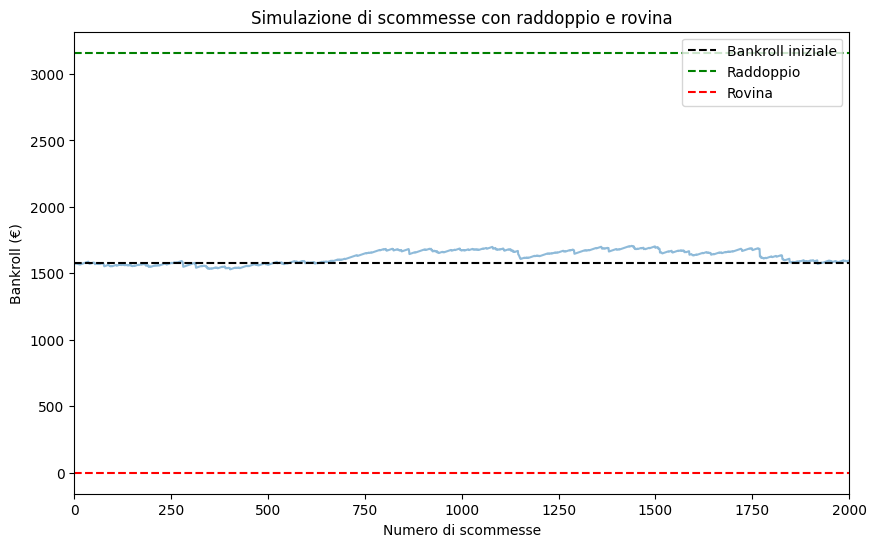

In [17]:
def tronca_storico(storico, goal):
    """Taglia lo storico alla prima volta che il bankroll raggiunge il goal o la rovina."""
    for i, valore in enumerate(storico):
        if valore >= goal or valore <= 0:
            return storico[: i + 1]  # Ritorna solo la parte utile
    return storico  # Se non ha raggiunto il goal o la rovina, lo lascia intatto

# Applica la funzione a tutte le simulazioni
for risultato in risultati:
    risultato["storico"] = tronca_storico(risultato["storico"], GOAL)

# Ora calcoliamo il massimo numero di cicli effettivi
max_cicli = max(len(risultato["storico"]) for risultato in risultati)

# Genera il grafico
plt.figure(figsize=(10, 6))

for risultato in risultati:
    plt.plot(range(len(risultato["storico"])), risultato["storico"], alpha=0.5)

plt.axhline(BANKROLL_INIZIALE, color="black", linestyle="--", label="Bankroll iniziale")
plt.axhline(GOAL, color="green", linestyle="--", label="Raddoppio")
plt.axhline(0, color="red", linestyle="--", label="Rovina")

plt.xlim(0, max_cicli)  # Imposta il limite massimo dell'asse X

plt.xlabel("Numero di scommesse")
plt.ylabel("Bankroll (€)")
plt.title("Simulazione di scommesse con raddoppio e rovina")
plt.legend()
plt.show()


# Mostra il riepilogo delle simulazioni

In [18]:
print(f"*******")
print("\nRiepilogo delle simulazioni:")
print(f"Simulazioni che hanno raggiunto il GOAL: {simulazioni_raggiunto_goal}")
print(f"Simulazioni che hanno esaurito il bankroll: {simulazioni_esaurito_bankroll}")
print(f"*******")

*******

Riepilogo delle simulazioni:
Simulazioni che hanno raggiunto il GOAL: 0
Simulazioni che hanno esaurito il bankroll: 0
*******


# Stampa tutte le giocate di una determinata simulazione

In [8]:
simulazione_id = 1  # Cambia con l'ID della simulazione che vuoi vedere

df = pd.DataFrame(tutte_le_giochi)

df_filtrato = df[df["id_simulazione"] == simulazione_id]
from IPython.display import display
pd.set_option('display.max_rows', None)  # Nessun limite al numero di righe
pd.set_option('display.max_columns', None)  # Mostra tutte le colonne
pd.set_option('display.expand_frame_repr', False)  # Evita la troncatura delle colonne
pd.set_option('display.max_colwidth', None)  # Evita la troncatura del testo nelle celle

display(df_filtrato)

,Ciclo N,Scommessa N,Puntata,Quota,Vincita,Netto,Vinta?,Bankroll,id_simulazione
1120,1,1,5,3.50,0.0,0.0,No,1575.0,1
1121,1,2,10,3.25,0.0,0.0,No,1565.0,1
1122,1,3,20,3.30,0.0,0.0,No,1545.0,1
1123,1,4,40,3.50,0.0,0.0,No,1505.0,1
1124,2,1,5,3.50,17.5,12.5,Sì,1437.5,1
1125,3,1,5,3.50,0.0,0.0,No,1432.5,1
1126,3,2,10,3.25,0.0,0.0,No,1422.5,1
1127,3,3,20,3.30,0.0,0.0,No,1402.5,1
1128,3,4,40,3.50,0.0,0.0,No,1362.5,1
1129,3,5,80,3.50,280.0,200.0,Sì,1562.5,1


# Riassunto delle simulazioni

In [9]:
print(f"*******")

df_riassuntivo = pd.DataFrame(df_filtrato)
print(df_riassuntivo.to_string(index=False))

# Calcolo delle simulazioni con profitto
simulazioni_con_profitto = sum(1 for r in risultati if r["profitto_perdita"] > 0)
totale_simulazioni = len(risultati)
percentuale_profitto = (simulazioni_con_profitto / totale_simulazioni) * 100

# Stampa del risultato
print(f"\nPercentuale di simulazioni con profitto: {percentuale_profitto:.2f}%")

print(f"*******")

*******
 Ciclo N  Scommessa N  Puntata  Quota  Vincita  Netto Vinta?  Bankroll  id_simulazione
       1            1        5   3.50      0.0    0.0     No    1575.0               1
       1            2       10   3.25      0.0    0.0     No    1565.0               1
       1            3       20   3.30      0.0    0.0     No    1545.0               1
       1            4       40   3.50      0.0    0.0     No    1505.0               1
       2            1        5   3.50     17.5   12.5     Sì    1437.5               1
       3            1        5   3.50      0.0    0.0     No    1432.5               1
       3            2       10   3.25      0.0    0.0     No    1422.5               1
       3            3       20   3.30      0.0    0.0     No    1402.5               1
       3            4       40   3.50      0.0    0.0     No    1362.5               1
       3            5       80   3.50    280.0  200.0     Sì    1562.5               1
       4            1        5   3.